In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedKFold
from pandas_ml import ConfusionMatrix

from sklearn.neighbors import NearestCentroid
from features import round_up_rows

/home/kurbanov/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def test_classifier(clf, X, Y):
    aucs = []
    precs = []
    recalls = []
    
    skf = StratifiedKFold(Y, n_folds=5, random_state=0)
    for train_index, test_index in skf:
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        auc = metrics.roc_auc_score(Y_test, Y_pred)
        prec = metrics.precision_score(Y_test, Y_pred)
        recall = metrics.recall_score(Y_test, Y_pred)
        
        aucs.append(auc)
        precs.append(prec)
        recalls.append(recall)
        break
        
    mean_auc = np.mean(aucs)
    mean_prec = np.mean(precs)
    mean_recall = np.mean(recalls)
    
    binary_confusion_matrix = ConfusionMatrix(Y_test, Y_pred)
 
    return mean_auc, mean_prec, mean_recall, binary_confusion_matrix


In [3]:
features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv")
# nrows = 500000
# features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv", nrows=nrows)
# features_df = round_up_rows(features_df)

In [4]:
features_df.shape

(3008500, 104)

In [5]:
mini_df = features_df

In [6]:
nfeatures = mini_df.shape[1] - 2
X = mini_df.iloc[:, :nfeatures].as_matrix()
Y = mini_df.IS_LAUGHTER.as_matrix()

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X.shape

(3008500, 102)

In [37]:
print(y_test.shape)
print(y_pred[:, 1].shape)

(164802,)
(164802,)


In [39]:
from sklearn.metrics import roc_curve, auc

y_score = y_pred[:, 1]
y_expected = y_test
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresholds = roc_curve(y_expected, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/home/kurbanov/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


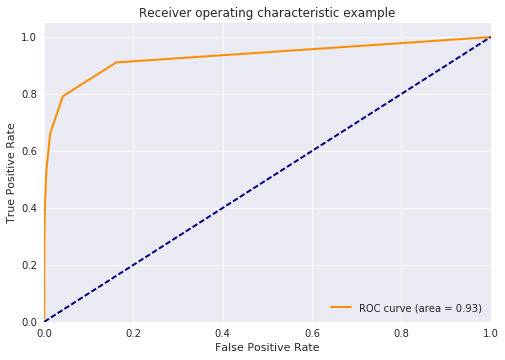

In [40]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [41]:
def test_classifier(clf, X, Y):
    aucs = []
    
    skf = StratifiedKFold(Y, n_folds=5, random_state=42)
    for train_index, test_index in skf:
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        auc = metrics.roc_auc_score(Y_test, Y_pred)
        
        aucs.append(auc)
        
    mean_auc = np.mean(aucs) 
    return mean_auc


In [ ]:
# big fat xgboost

In [9]:
# X = MinMaxScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)

clf, name = xgb.XGBClassifier(), "XGBoost"
print("\n", name)
clf.fit(X, Y)
# y_pred = clf.predict_proba(X_test)
# auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
# print("AUC:", auc)


 XGBoost


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [10]:
clf

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [11]:
from sklearn.externals import joblib
joblib.dump(clf, '../models/XGBClassifier_3kk_pyAA10.pkl') 

['../models/XGBClassifier_3kk_pyAA10.pkl']

In [39]:
# # for clf, name in [(xgb.XGBClassifier(), "XGBoost")]:
# xgboost = xgb.XGBClassifier()
# mean_auc, mean_prec, mean_recall, binary_confusion_matrix = test_classifier(xgboost, X, Y)
# print(binary_confusion_matrix)
# print("AUC: ", mean_auc)
# print("PREC: ", mean_prec)
# print("RECALL: ", mean_recall)
# #     print(name + " AUC: ", )

Predicted       0     1  __all__
Actual                          
0          578788  1642   580430
1           18467  2804    21271
__all__    597255  4446   601701
AUC:  0.564496866097
PREC:  0.630679262258
RECALL:  0.131822669362


In [41]:
# for clf, name in [(NearestCentroid(), "NearestCentroid")]:
#     mean_auc, mean_prec, mean_recall, binary_confusion_matrix = test_classifier(clf, X, Y)
#     print(binary_confusion_matrix)
#     print("AUC: ", mean_auc)
#     print("PREC: ", mean_prec)
#     print("RECALL: ", mean_recall)
# #     print(name + " AUC: ", )

Predicted       0       1  __all__
Actual                            
0          461992  118438   580430
1            6547   14724    21271
__all__    468539  133162   601701
AUC:  0.744078941512
PREC:  0.110572085129
RECALL:  0.692210051243
